## Importing Required Libraries

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import pytorch_lightning as pl
import random
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

## Loading & Preparing Data Into Working Space

In [51]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Moving MNIST dataset
data_path = "mnist_test_seq.npy"
data = np.load(data_path)  # Shape: (20, 10000, 64, 64) => (time, sequences, height, width)

# Transpose to rearrange the dimensions: (10000, 20, 64, 64)
data = data.transpose(1, 0, 2, 3)

# Normalize pixel values to [0, 1]
data = data / 255.0

# Add channel dimension to make it compatible with Conv2D layers: (10000, 20, 64, 64, 1)
data = data[..., np.newaxis]

# Split the dataset into training, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

print(f"Train data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (6400, 20, 64, 64, 1)
Validation data shape: (1600, 20, 64, 64, 1)
Test data shape: (2000, 20, 64, 64, 1)


## Model Architecture:-

c:\Om Shrivastav\Thesis_Work\Auto-Encoder\myenv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Functional)            │ (None, 64, 64, 1)      │       241,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 482,177 (1.84 MB)

 Trainable params: 481,281 (1.84 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 376s 186ms/step - accuracy: 0.9248 - loss: 0.0133 - val_accuracy: 0.9315 - val_loss: 0.0026
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 368s 184ms/step - accuracy: 0.9313 - loss: 0.0033 - val_accuracy: 0.9317 - val_loss: 0.0020
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 364s 182ms/step - accuracy: 0.9316 - loss: 0.0026 - val_accuracy: 0.9317 - val_loss: 0.0017
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 363s 182ms/step - accuracy: 0.9316 - loss: 0.0023 - val_accuracy: 0.9318 - val_loss: 0.0015
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 363s 181ms/step - accuracy: 0.9316 - loss: 0.0021 - val_accuracy: 0.9318 - val_loss: 0.0015
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 363s 182ms/step - accuracy: 0.9317 - loss: 0.0019 - val_accuracy: 0.9317 - val_loss: 0.0015
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 363s 181ms/step - accuracy: 0.9318 - loss: 0.0018 - val_accuracy: 0.9318 - val_loss: 0.0013
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 370s 185ms/step - ac

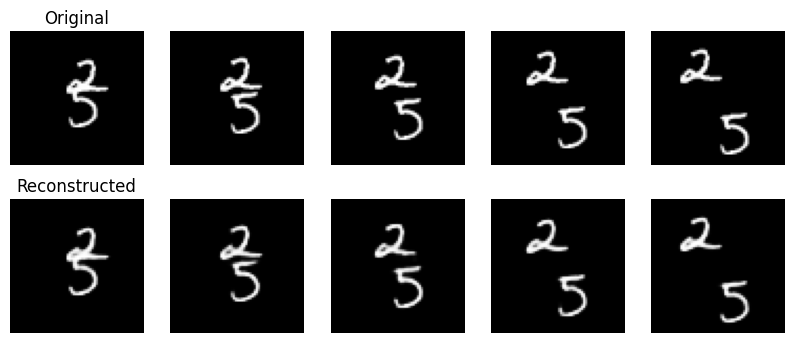

In [ ]:
# Load and preprocess the Moving MNIST dataset
data_path = "mnist_test_seq.npy"
data = np.load(data_path).transpose(1, 0, 2, 3)  # Shape: (10000, 20, 64, 64)
data = data / 255.0  # Normalize to [0, 1]
data = data[..., np.newaxis]  # Add channel dimension: (10000, 20, 64, 64, 1)

# Split into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Encoder
def build_encoder(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    x = layers.Dropout(0.3)(x)  # Dropout for regularization
    latent_space = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    return models.Model(inputs, latent_space, name="Encoder")

# Decoder
def build_decoder(latent_shape):
    inputs = layers.Input(shape=latent_shape)
    x = layers.Conv2D(128, (3, 3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.UpSampling2D((2, 2))(x)
    
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.UpSampling2D((2, 2))(x)
    
    x = layers.Conv2D(32, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.UpSampling2D((2, 2))(x)
    
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return models.Model(inputs, outputs, name="Decoder")

# Build Autoencoder
def build_autoencoder(input_shape, latent_shape):
    encoder = build_encoder(input_shape)
    decoder = build_decoder(latent_shape)
    autoencoder = models.Model(encoder.input, decoder(encoder.output), name="Autoencoder")
    return autoencoder

# Model parameters
input_shape = (64, 64, 1)
latent_shape = (8, 8, 128)

autoencoder = build_autoencoder(input_shape, latent_shape)
autoencoder.summary()

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## Training Loop:-

In [ ]:
# Prepare data for training
train_x, train_y = train_data.reshape(-1, 64, 64, 1), train_data.reshape(-1, 64, 64, 1)
val_x, val_y = val_data.reshape(-1, 64, 64, 1), val_data.reshape(-1, 64, 64, 1)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop if no improvement for 5 epochs
    restore_best_weights=True  # Restore the best weights after stopping
)

# Train the model
history = autoencoder.fit(
    train_x, train_y,
    validation_data=(val_x, val_y),
    epochs=50,  # Max epochs
    batch_size=64,
    callbacks=[early_stopping]
)

# Evaluate the model
test_x, test_y = test_data.reshape(-1, 64, 64, 1), test_data.reshape(-1, 64, 64, 1)
test_loss, test_accuracy = autoencoder.evaluate(test_x, test_y)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Visualize some reconstructed samples
n_samples = 5
predictions = autoencoder.predict(test_x[:n_samples])

plt.figure(figsize=(10, 4))
for i in range(n_samples):
    # Original
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(test_x[i].squeeze(), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Original")
    
    # Reconstructed
    plt.subplot(2, n_samples, i + 1 + n_samples)
    plt.imshow(predictions[i].squeeze(), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Reconstructed")
plt.show()

## Saving Model

In [60]:
# Save the model
model_save_path = "autoencoder_model.h5"
autoencoder.save(model_save_path)
print(f"Model saved at: {model_save_path}")

Model saved at: autoencoder_model.h5


## Perfomance Visualization Epochwise

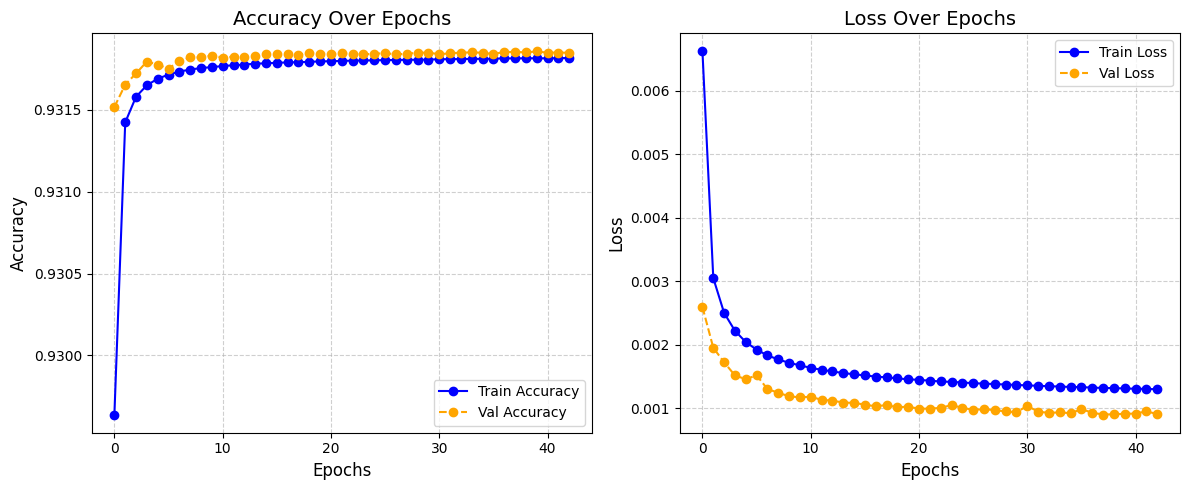

In [64]:
import matplotlib.pyplot as plt

def plot_training_history_1row2col(history):
    """
    Plots training and validation metrics from Keras training history in a 1-row, 2-column layout.

    Parameters:
    - history: The history object from the trained Keras model.
    """
    metrics = [key for key in history.history.keys() if not key.startswith('val_')]
    val_metrics = [f"val_{metric}" for metric in metrics]
    
    num_metrics = len(metrics)  # Number of metrics to plot
    cols = 2
    rows = -(-num_metrics // cols)  # Ceiling division for rows

    fig, axes = plt.subplots(rows, cols, figsize=(12, 5))
    axes = axes.ravel()  # Flatten the axes array for easy indexing

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        
        # Plot training metric
        ax.plot(history.history[metric], 'o-', label=f"Train {metric.capitalize()}", color='blue')
        
        # Plot validation metric, if available
        val_metric = f"val_{metric}"
        if val_metric in history.history:
            ax.plot(history.history[val_metric], 'o--', label=f"Val {metric.capitalize()}", color='orange')

        # Customize plot
        ax.set_title(f"{metric.capitalize()} Over Epochs", fontsize=14)
        ax.set_xlabel("Epochs", fontsize=12)
        ax.set_ylabel(metric.capitalize(), fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(loc='best')
    
    # Hide unused subplots
    for idx in range(len(metrics), len(axes)):
        axes[idx].axis('off')

    # Adjust layout and display the plot
    fig.tight_layout()
    plt.show()

# Call the function with the existing history object
plot_training_history_1row2col(history)


## Loading Model and making prediction on test data

In [66]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load the trained model
model_path = "autoencoder_model.h5"
autoencoder = load_model(model_path, custom_objects={'mse': MeanSquaredError()})

# Display the loaded model summary
autoencoder.summary()

Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Functional)            │ (None, 64, 64, 1)      │       241,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 482,179 (1.84 MB)

 Trainable params: 481,281 (1.84 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 2 (12.00 B)